In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# load Model and Test
loaded = np.load("utils\\dataset.npz")
x = loaded['x']
y = loaded['y']

In [3]:
dataset_path = "E:\Project\Data Science\Face Recognition\dataset"
dir_path = glob.glob(dataset_path + "\*")

Suprise


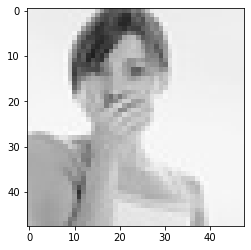

In [4]:
# Extraction Label
string_label = []
string_number = []
for string in dir_path:
    string_label.append(string.split("\\")[5])

plt.imshow(x[27000])
print(string_label[y[27000]])

In [42]:
# Lets do the cross validation
from sklearn.model_selection import StratifiedKFold as skf

skf_model = skf(n_splits=6, random_state=21, shuffle=True)
for train_idx, test_idx in skf_model.split(x, y):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [43]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(28273,)
(23561,)
(4712,)


In [44]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6, dtype='int16')
y_test = to_categorical(y_test, num_classes=6, dtype='int16')

In [59]:
import tensorflow as tf

def create_model():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(48, 48, 3)),
        tf.keras.layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        
        #tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        #tf.keras.layers.Conv2D(16, (3, 3), strides=(2, 2), activation='relu', kernel_initializer="he_uniform", bias_reguralizer=tf.keras.regularizers.L2(0.01)),
        
        tf.keras.layers.Dense(16, activation="relu"),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation="softmax")
    ])

In [61]:
model = create_model()

opt = tf.keras.optomizers.RMSprop(learning_rate=0.0005, momentum=0.8)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 46, 46, 16)        448       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 45, 45, 16)        1040      
_________________________________________________________________
batch_normalization_14 (Batc (None, 45, 45, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 21, 21, 16)        1040      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
dense_30 (Dense)             (None, 10, 10, 16)      

In [62]:
history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=8,
    validation_steps=8,
    epochs=50,
    validation_data=(x_test, y_test)
)

Epoch 1/50
8/8 [==============================] - 17s 2s/step - loss: 1.7813 - accuracy: 0.2372 - val_loss: 2.7352 - val_accuracy: 0.2511
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 1.7150 - accuracy: 0.2748 - val_loss: 2.3732 - val_accuracy: 0.2523
Epoch 3/50
8/8 [==============================] - 18s 2s/step - loss: 1.6811 - accuracy: 0.3011 - val_loss: 2.0410 - val_accuracy: 0.2736
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 1.6555 - accuracy: 0.3179 - val_loss: 1.9748 - val_accuracy: 0.2672
Epoch 5/50
8/8 [==============================] - 18s 2s/step - loss: 1.6232 - accuracy: 0.3422 - val_loss: 1.7550 - val_accuracy: 0.3033
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 1.5913 - accuracy: 0.3592 - val_loss: 1.9505 - val_accuracy: 0.2492
Epoch 7/50
8/8 [==============================] - 17s 2s/step - loss: 1.5594 - accuracy: 0.3797 - val_loss: 1.8254 - val_accuracy: 0.2714
Epoch 8/50
8/8 [==================

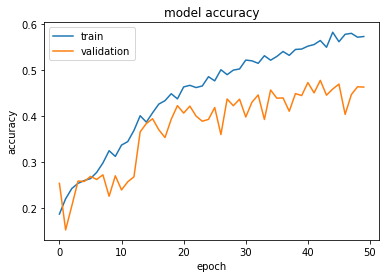

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

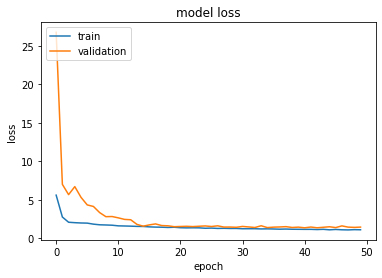

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Akurasi : {} %".format(str(score[1] * 100)))

221/221 - 1s - loss: 1.4721 - accuracy: 0.4635
Akurasi : 46.349745988845825 %


In [77]:
from tensorflow.keras.models import model_from_json

# Save Model
model_json = model.to_json()
with open("utils//model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("utils//weight.h5")